In [18]:
%run Functions.ipynb

In [19]:
plt.style.use(["seaborn-dark-palette", "seaborn-whitegrid"])

## Analysis
#### For all the tradable assets on bitmex that have funding rate, the following analysis are performed:
- How does the price reacts during the 1m before and 1m after the rate?
- How does the price reacts in a different time window?
- Is the effect different for positive and negative rates?
- Did the behaviour of price-rate changed overtime?
- What happens to the returns if we consider commissions?
- What happens if we try to trade the strategy with a market making rule?

### 1. How does the price reacts during the 1m before and 1m after the rate?

### Bitcoin
- The strategy would give a slightly positive return. However we can notice a strong correlation (considering the unavoidable noise deriving from price exposure of 2 minutes) of -0.79 between realized return and collected rate. This means that the funding rate is priced in in the following minute it hit quite efficiently.
- Observing the cumulative return graph, we can see that until mid 2017 the price was undercorrecting with respect to the rate, implying a positive return from the strategy. Viceversa after mid 2017, we notice that the price overreact to the fundingrate, making the strategy performing negatively
- It is also visible from the return decomposition that when the collected rate is be high, the return tends to be compensated with a strong negative sign. 

In [60]:
summary,trades = Strategy("XBTUSD",                    # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 2559529/2559529 [03:16<00:00, 0.00s/it]

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-08-06 20:00:00,4587,4587,1504,3083,-273.3 %,293.646 %,0.0 %,0.0 %,0.0 %,20.345 %,4.803 %,-0.439609,6.589 %,0.729024,55.592 %,55.141 %,56.516 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=0, percent=2047634, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


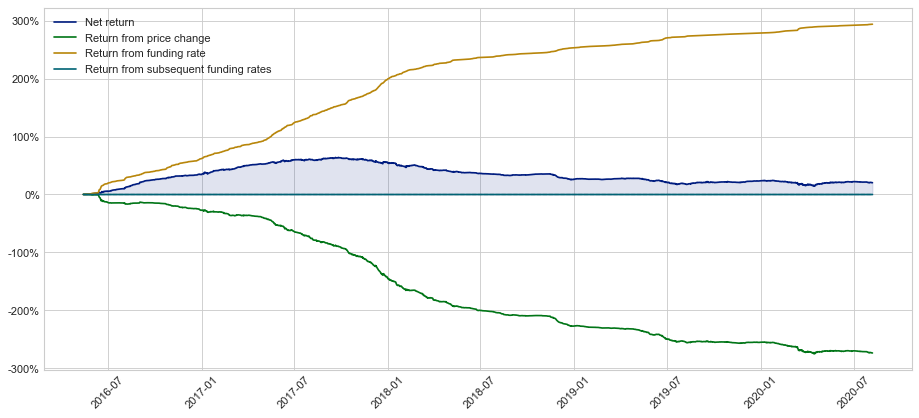

asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=0, percent=2047634, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


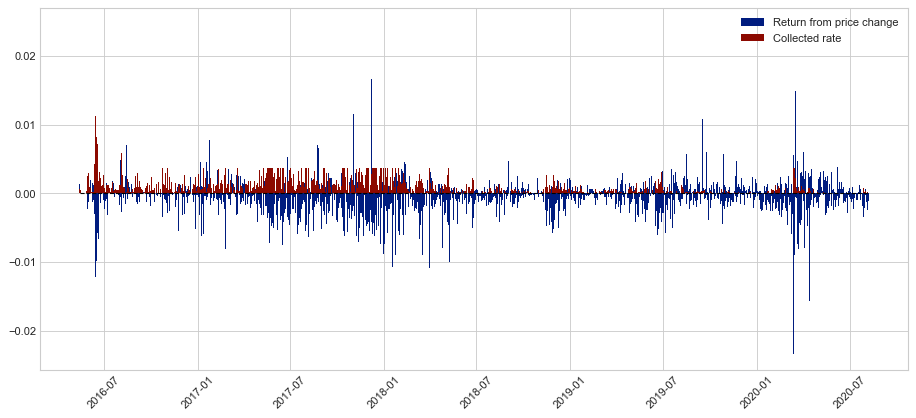

In [61]:
Plot_results(trades,asset = "XBTUSD", show_cumulative=True, decompose = True)
Plot_results(trades,asset = "XBTUSD", show_bars=True)

### Ethereum
- We can immediately notice that the strategy had a slightly positive return, meaning that the funding rate is not completely and immediately priced in, in the Bitmex ethereum market. Differently to Bitcoin, the correlation between price and rate is lower (-0.55), and also in the latest period the market tends to undercorrect the funding rate. Observing the bar chart, we can see as in Bitcoin that there is a cluster formation of high funding rates (and consequently high negative returns), and clusters of low returns.

In [62]:
summary,trades = Strategy("ETHUSD",                    # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 1059280/1059280 [00:46<00:00, 0.00s/it]

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-08-06 20:00:00,2207,2207,77,2130,-56.38 %,115.239 %,0.0 %,0.0 %,0.0 %,58.859 %,29.19 %,-0.186391,7.148 %,4.083375,58.949 %,59.343 %,48.052 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=0, percent=847434, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


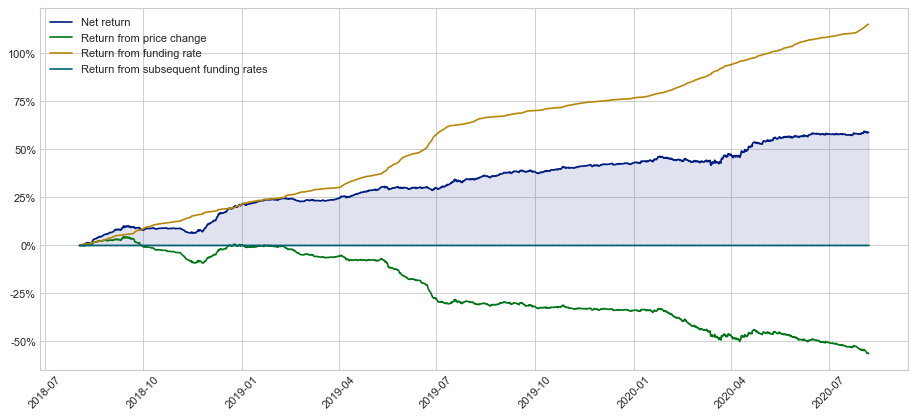

asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=0, percent=847434, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


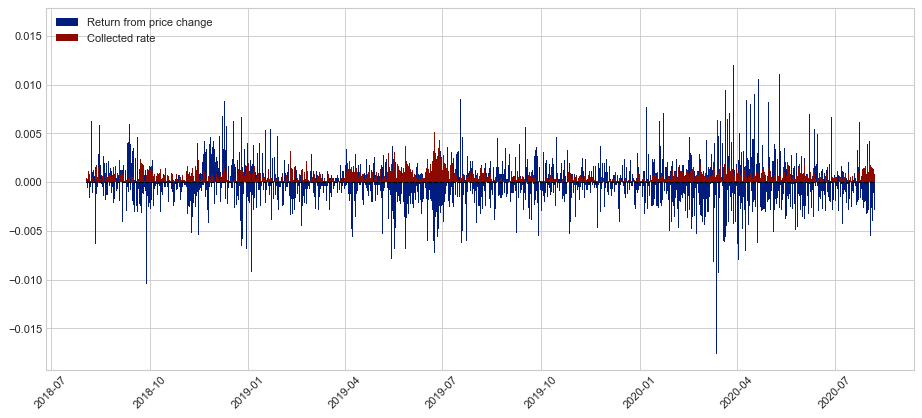

In [63]:
Plot_results(trades,asset = "ETHUSD", show_cumulative=True, decompose = True)
Plot_results(trades,asset = "ETHUSD", show_bars=True)

<hr>

### 2. How does the price reacts in a different time window? 
Describe the results of the different time windows

### Bitcoin

In [160]:
import itertools
holds = [2, 10, 60, 60*8]
all_summary= []
all_trades = []

for hold in holds:
    summary,trades =  Strategy("XBTUSD",            # Name of the asset
                      exchanger= "bitmex",          # Exchanger where to trade
                      my_signal=["fundingRate"],    # List of conditions
                      window_open_wrt_signal = -1,  # When to open with respect to signal (at close)
                      window_hold = hold,           # How many minutes should we hold the trade
                      long = True,                  # Allow long trades
                      short = True,                 # Allow short trades
                      long_param = [0],             # Open position if rate < this parameter
                      short_param = [0],            # Open position if rate > this parameter
                      market_making = False,        # Use market making strategy
                      commission_market_taking = 0, # Set commission
                      divide=False)                 # divide into train-test
    all_summary.append(summary.iloc[0])
    all_trades.append(trades)

summary = pd.DataFrame(all_summary)
summary

 [████████████████████████████████████████████████████████████] 2536148/2536148 [02:53<00:00, 0.00s/it]

1530


 [████████████████████████████████████████████████████████████] 2536140/2536140 [03:09<00:00, 0.00s/it]

1530


 [████████████████████████████████████████████████████████████] 2536090/2536090 [03:12<00:00, 0.00s/it]

1530


 [████████████████████████████████████████████████████████████] 2535670/2535670 [03:13<00:00, 0.00s/it]

1529


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-07-21 04:00:00,4537,4537,1504,3033,-53.52 %,57.31 %,0.0 %,0.0 %,0.0 %,3.79 %,0.9 %,-0.789719,1.17 %,0.769716,83.54 %,87.14 %,76.26 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-07-21 04:00:00,4537,4537,1504,3033,-63.61 %,57.31 %,0.0 %,0.0 %,0.0 %,-6.3 %,-1.5 %,-0.569252,2.0 %,-0.753346,79.06 %,82.72 %,71.68 %,100.0 %,0.0 %,0.0 %,0.0 %,10,0.17
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-07-21 04:00:00,4537,4537,1504,3033,-55.49 %,57.31 %,0.0 %,0.0 %,0.0 %,1.82 %,0.43 %,-0.372389,4.29 %,0.101005,73.4 %,76.43 %,67.29 %,100.0 %,0.0 %,0.0 %,0.0 %,60,1.00
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-07-20 20:00:00,4536,4536,1504,3032,7.3 %,57.31 %,0.0 %,0.0 %,0.0 %,64.61 %,15.42 %,0.035626,12.0 %,1.285102,64.07 %,63.85 %,64.49 %,100.0 %,0.0 %,0.0 %,0.0 %,480,8.00


### Ethereum

In [161]:
import itertools
holds = [2, 10, 60, 60*8]
all_summary= []
all_trades = []

for hold in holds:
    summary,trades =  Strategy("ETHUSD",            # Name of the asset
                      exchanger= "bitmex",          # Exchanger where to trade
                      my_signal=["fundingRate"],    # List of conditions
                      window_open_wrt_signal = -1,  # When to open with respect to signal (at close)
                      window_hold = hold,           # How many minutes should we hold the trade
                      long = True,                  # Allow long trades
                      short = True,                 # Allow short trades
                      long_param = [0],             # Open position if rate < this parameter
                      short_param = [0],            # Open position if rate > this parameter
                      market_making = False,        # Use market making strategy
                      commission_market_taking = 0, # Set commission
                      divide=False)                 # divide into train-test
    all_summary.append(summary.iloc[0])
    all_trades.append(trades)

summary = pd.DataFrame(all_summary)
summary

 [████████████████████████████████████████████████████████████] 1035407/1035407 [00:35<00:00, 0.00s/it]

720


 [████████████████████████████████████████████████████████████] 1035399/1035399 [00:39<00:00, 0.00s/it]

720


 [████████████████████████████████████████████████████████████] 1035349/1035349 [00:38<00:00, 0.00s/it]

720


 [████████████████████████████████████████████████████████████] 1034929/1034929 [00:41<00:00, 0.00s/it]

719


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-07-21 04:00:00,2157,2157,77,2080,-15.14 %,24.59 %,0.0 %,0.0 %,0.0 %,9.45 %,4.79 %,-0.550005,1.43 %,3.353887,76.17 %,76.06 %,79.22 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-07-21 04:00:00,2157,2157,77,2080,-20.46 %,24.59 %,0.0 %,0.0 %,0.0 %,4.13 %,2.09 %,-0.340416,3.03 %,0.691927,66.06 %,66.25 %,61.04 %,100.0 %,0.0 %,0.0 %,0.0 %,10,0.17
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-07-21 04:00:00,2157,2157,77,2080,-17.76 %,24.59 %,0.0 %,0.0 %,0.0 %,6.83 %,3.46 %,-0.067675,5.4 %,0.642021,60.18 %,60.19 %,59.74 %,100.0 %,0.0 %,0.0 %,0.0 %,60,1.00
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-07-20 20:00:00,2156,2156,77,2079,28.34 %,24.59 %,0.0 %,0.0 %,0.0 %,52.93 %,26.87 %,0.035268,17.34 %,1.549475,54.45 %,54.3 %,58.44 %,100.0 %,0.0 %,0.0 %,0.0 %,480,8.00


<hr>

### 3. Is the effect different for positive and negative rates?
Decomposing the trades in long only (when funding is negative) and short only (when funding is positive) we can grasp some more information:
- The short trades count for majority of the strategy, implying that most of the times, longs pays shorts the funding.
- The behaviour of long trades and short ones is similar: the price on average moves in the opposite direction of the rate


### Bitcoin

In [162]:
summary,trades = Strategy("XBTUSD",                    # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = False,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 2536148/2536148 [01:23<00:00, 0.00s/it]

740


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-06-19 12:00:00 to 2020-07-05 20:00:00,1504,1504,1504,0,-19.62 %,19.07 %,0.0 %,0.0 %,0.0 %,-0.55 %,-0.27 %,-0.616636,1.12 %,-0.240286,76.26 %,0.0 %,76.26 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


In [163]:
summary,trades = Strategy("XBTUSD",                    # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = False,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 2536148/2536148 [02:21<00:00, 0.00s/it]

1253


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-07-21 04:00:00,3033,3033,0,3033,-33.9 %,38.23 %,0.0 %,0.0 %,0.0 %,4.33 %,1.26 %,-0.85404,0.96 %,1.31318,87.14 %,87.14 %,0.0 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


### Ethereum

In [164]:
summary,trades = Strategy("ETHUSD",                    # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = False,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 1035407/1035407 [00:08<00:00, 0.00s/it]

61


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-15 20:00:00 to 2020-05-04 12:00:00,77,77,77,0,-0.25 %,1.19 %,0.0 %,0.0 %,0.0 %,0.94 %,5.63 %,-0.07774,2.1 %,2.683948,79.22 %,0.0 %,79.22 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


In [165]:
summary,trades = Strategy("ETHUSD",                    # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = False,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 1035407/1035407 [00:36<00:00, 0.00s/it]

718


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-07-21 04:00:00,2080,2080,0,2080,-14.89 %,23.4 %,0.0 %,0.0 %,0.0 %,8.51 %,4.33 %,-0.64106,1.24 %,3.48894,76.06 %,76.06 %,0.0 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


<hr>

### 5. Did the behaviour of price-rate changed overtime?
Analyzing the return of the strategy over different periods, we observe that:
- The markets tends to become more efficient with time, specially on Bitcoin: in fact in the first years the price didn't discount the funding rate, yielding the strategy a solid return with a sharpe ratio above 3. In the following years the market better corrected the funding rate in the price, making the strategy returning a negative payoff.
- Consistently with the findings above, Ethereum didn't priced in the funding rate completely, yielding this strategy positive return in each subsample.
- We decided not to subset Ripple for the small data available

### Bitcoin

In [149]:
res = pd.DataFrame({})
start_analysis = min(df_xbt_bitmex.index).date()
days_window    = 250

while start_analysis < date.today():
    summary,trades = Strategy("XBTUSD",                # Name of the asset
                          date_start = str(start_analysis), # Startingdate
                          n_days = days_window,
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
    
    start_analysis = start_analysis + timedelta(days=days_window)
    res = res.append(pd.DataFrame(summary))

res

 [████████████████████████████████████████████████████████████] 359987/359987 [00:02<00:00, 0.00s/it]

19


 [████████████████████████████████████████████████████████████] 359987/359987 [00:06<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 16411/16411 [00:00<00:00, 0.00s/it]

12


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2016-06-01 12:00:00,19,19,0,19,-0.47 %,0.99 %,0.0 %,0.0 %,0.0 %,0.52 %,9.92 %,-0.993662,1.51 %,6.581066,100.0 %,100.0 %,0.0 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-06-01 12:00:00 to 2017-02-05 20:00:00,742,742,230,512,-11.47 %,18.75 %,0.0 %,0.0 %,0.0 %,7.28 %,10.62 %,-0.870258,1.74 %,6.117987,90.3 %,90.04 %,90.87 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2017-02-06 04:00:00 to 2017-10-13 20:00:00,745,745,306,439,-45.8 %,54.01 %,0.0 %,0.0 %,0.0 %,8.21 %,11.98 %,-0.728047,3.33 %,3.602930,72.21 %,73.58 %,70.26 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2017-10-14 04:00:00 to 2018-06-20 20:00:00,748,748,278,470,-61.04 %,47.38 %,0.0 %,0.0 %,0.0 %,-13.66 %,-19.95 %,-0.760164,4.52 %,-4.410933,56.95 %,61.91 %,48.56 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2018-06-21 04:00:00 to 2019-02-25 20:00:00,750,750,309,441,-17.4 %,10.43 %,0.0 %,0.0 %,0.0 %,-6.97 %,-10.18 %,-0.917586,1.97 %,-5.157401,72.53 %,84.81 %,55.02 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2019-02-26 04:00:00 to 2019-11-02 12:00:00,749,749,216,533,-7.42 %,5.02 %,0.0 %,0.0 %,0.0 %,-2.4 %,-3.51 %,-0.871524,1.05 %,-3.347420,75.97 %,75.98 %,75.93 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2019-11-03 04:00:00 to 2020-07-09 20:00:00,750,750,165,585,-14.04 %,8.94 %,0.0 %,0.0 %,0.0 %,-5.1 %,-7.45 %,-0.677926,7.53 %,-0.988983,71.07 %,72.14 %,67.27 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2020-07-10 04:00:00 to 2020-07-21 04:00:00,34,34,0,34,-0.53 %,0.33 %,0.0 %,0.0 %,0.0 %,-0.2 %,-6.07 %,-0.033534,2.27 %,-2.679464,55.88 %,55.88 %,0.0 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


### Ethereum

In [150]:
res = pd.DataFrame({})
start_analysis = min(df_eth_bitmex.index).date()
days_window    = 250

while start_analysis < date.today():
    summary,trades = Strategy("ETHUSD",                # Name of the asset
                          date_start = str(start_analysis), # Startingdate
                          n_days = days_window,
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
    
    start_analysis = start_analysis + timedelta(days=days_window)
    res = res.append(pd.DataFrame(summary))

res

 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

251


 [████████████████████████████████████████████████████████████] 359987/359987 [00:07<00:00, 0.00s/it]

250


 [████████████████████████████████████████████████████████████] 315945/315945 [00:06<00:00, 0.00s/it]

220


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2019-04-09 04:00:00,750,750,48,702,-4.9 %,8.1 %,0.0 %,0.0 %,0.0 %,3.2 %,4.65 %,-0.414875,1.29 %,3.602183,78.8 %,79.77 %,64.58 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2019-04-09 04:00:00 to 2019-12-14 20:00:00,750,750,21,729,-9.96 %,11.64 %,0.0 %,0.0 %,0.0 %,1.68 %,2.45 %,-0.842332,1.24 %,1.973719,77.87 %,77.5 %,90.48 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2019-12-15 04:00:00 to 2020-07-21 04:00:00,658,658,8,650,-2.82 %,14.24 %,0.0 %,0.0 %,0.0 %,11.42 %,18.94 %,-0.005351,4.1 %,4.621177,61.09 %,61.08 %,62.5 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


<hr>

### 6. What happens to the returns if we consider commissions?
The upper mentioned returns are possible only in theory: in practice Bitmex charges a 7.5 basis point for each market taking order executed on the platform. By checking the returns with the real market environment, we analyze that the commissions prevail on the funding return, making each strategy a negative yield. From the graph we can see that even if the difference between the funding rate and price movement is slightly positive, the commissions are the main drivers of (negative) returns.

### Bitcoin

In [154]:
summary, trades = Strategy("XBTUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = -0.075/100,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 2536148/2536148 [03:02<00:00, 0.00s/it]

1530


,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-07-21 04:00:00,4537,4537,1504,3033,-53.52 %,57.31 %,0.0 %,-19.49 %,-19.49 %,-35.2 %,-8.4 %,-0.789719,1.29 %,-6.528066,7.21 %,5.64 %,10.37 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=1, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2028929, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


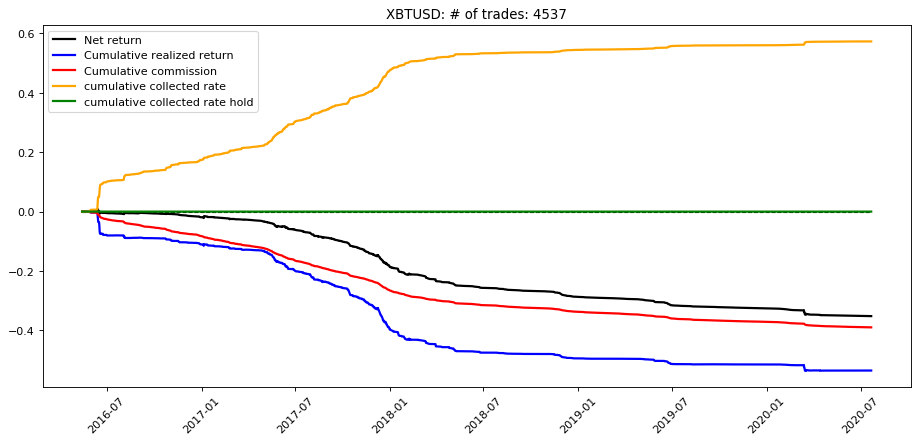

In [155]:
Plot_results(trades,asset = "XBTUSD",show_cumulative=True)

### Ethereum

In [49]:
summary, trades = Strategy("ETHUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = -0.075/100,# Set commission
                          divide=False)                # divide into train-test
summary

 [████████████████████████████████████████████████████████████] 1059280/1059280 [00:45<00:00, 0.00s/it]

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-08-06 20:00:00,2207,2207,77,2130,-56.38 %,115.239 %,0.0 %,-165.525 %,-165.525 %,-272.191 %,-134.986 %,-0.186391,7.149 %,-18.882564,19.529 %,19.671 %,15.584 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=847434, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


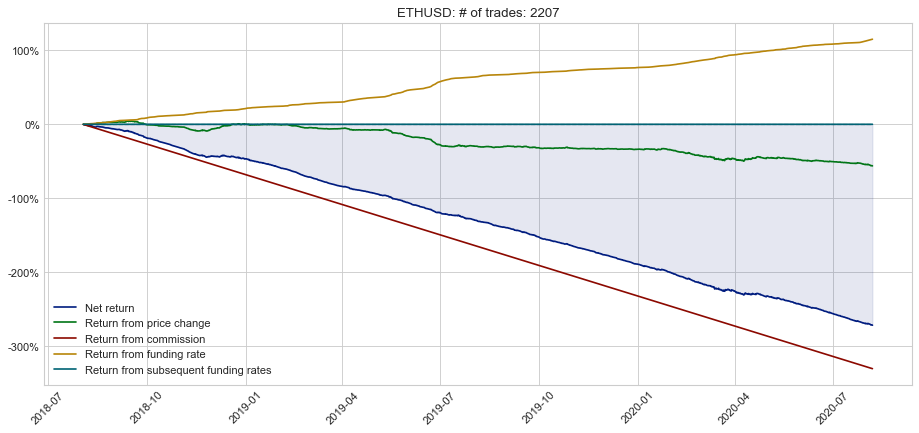

In [50]:
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)

<hr>

### 7. What happens if we try to trade the strategy with a market making rule? 
#### Case 1: Short holding period and market making window
Seeing how commissions are destroying the returns in the market taking strategy, it is worth exploring if you can pocket the market making commission and the rate with a market making trading strategy.

We can clearly see that by market making the return from price change takes a hit, all parameters constant.
The a possible explaination would be that we only enter trades that yield a negative return, due to the market making structure of the orders.

### Bitcoin

In [176]:
summary, trades = Strategy("XBTUSD", my_signal=["fundingRate"],  exchanger="bitmex",
                window_open_wrt_signal=-5, window_mm_open=5, window_hold=5, window_mm_close=5, divide=True)
Plot_results(trades,asset = "XBTUSD",show_cumulative=True)
summary

 [████████████████████████████████████████████████████████████] 2028914/2028914 [02:39<00:00, 0.00s/it]

853


### Ethereum

 [████████████████████████████████████████████████████████████] 1059278/1059278 [02:02<00:00, 0.00s/it]

asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=4, window_hold=5,window_mm_close=5, window_open_wrt_signal=-5,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=847434, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


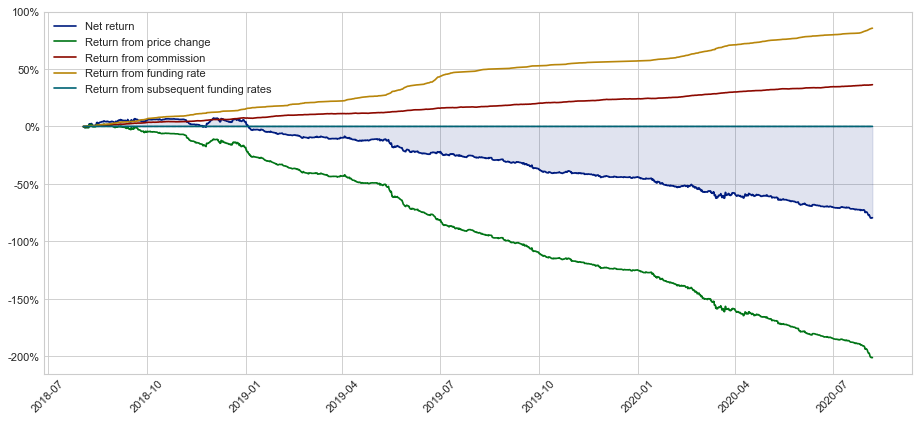

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-08-06 20:00:00,2207,1611,57,1554,-201.06 %,85.342 %,0.0 %,40.275 %,-4.025 %,-79.468 %,-39.41 %,-0.191173,12.816 %,-3.075191,44.755 %,44.659 %,47.368 %,72.995 %,0.0 %,0.0 %,100.0 %,5,0.08


In [54]:
summary, trades = Strategy("ETHUSD", my_signal=["fundingRate"],  exchanger="bitmex",
                window_open_wrt_signal=-5, window_mm_open=5, window_hold=5, window_mm_close=5, divide=False)
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

#### Case 2: Longer holding period and market making window
By increasing the market making window for opening and closing the position to 2 hours:
- you open more trades, because the price will hit your order more likely in 2 hours rather than 1 minute
- You can close more trades by market making
- The adverse selection component decreases. To simply explain why, think about two traders, one with a time horizon of 5 minutes and one with a time horizon of 10 years. Who cares more about a difference in the entry price of 0.01%?

With a 120,1,120 parameter we can see that the effect of the price change is exactly equal to the funding rate collected, making the commission from market making equal to net profit.

 [████████████████████████████████████████████████████████████] 2028449/2028449 [03:32<00:00, 0.00s/it]

986
asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0.0003], window_mm_open=119, window_hold=240,window_mm_close=120, window_open_wrt_signal=-120,long=True, short=True, date_start=2010-01-01,n_days=0, size=1, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2028929, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


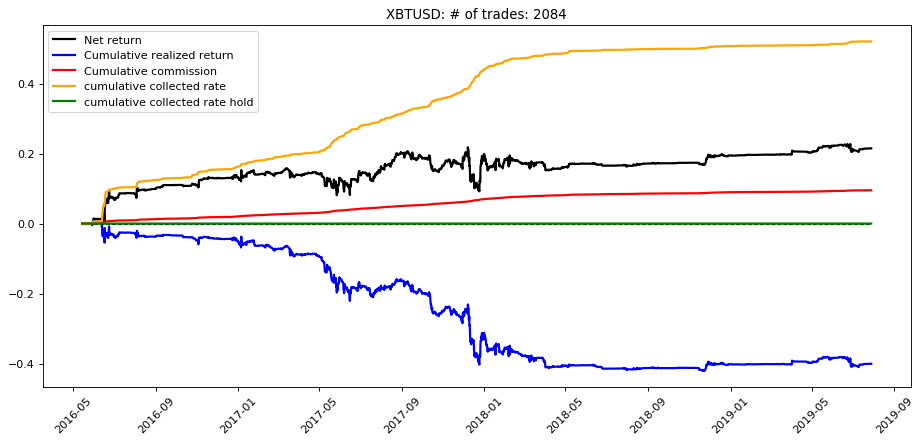

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2019-07-28 12:00:00,2232,2084,1219,865,-40.05 %,52.02 %,0.0 %,5.34 %,4.16 %,21.47 %,7.95 %,-0.053027,10.8 %,0.735589,56.14 %,49.94 %,60.54 %,93.37 %,0.0 %,0.0 %,100.0 %,240,4.0


In [179]:
summary, trades = Strategy("XBTUSD", my_signal=["fundingRate"], exchanger="bitmex",
                window_open_wrt_signal=-120, window_mm_open=120, window_hold=120, window_mm_close=120, divide=True)
Plot_results(trades,asset = "XBTUSD",show_cumulative=True)
summary

By incresaing the holding period of the position (window_after equal to 2,6,12, 24 hours) you:
- dramatically increase the variance, making the adverse selection component irrelevant
- and you pocket more funding, expressed as collected_rate_hold
- The funding is a positive component, because we can see persistence of the sign of the funding!

 [████████████████████████████████████████████████████████████] 2027129/2027129 [03:34<00:00, 0.00s/it]

986
asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0.0003], window_mm_open=239, window_hold=1440,window_mm_close=120, window_open_wrt_signal=-240,long=True, short=True, date_start=2010-01-01,n_days=0, size=1, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2028929, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


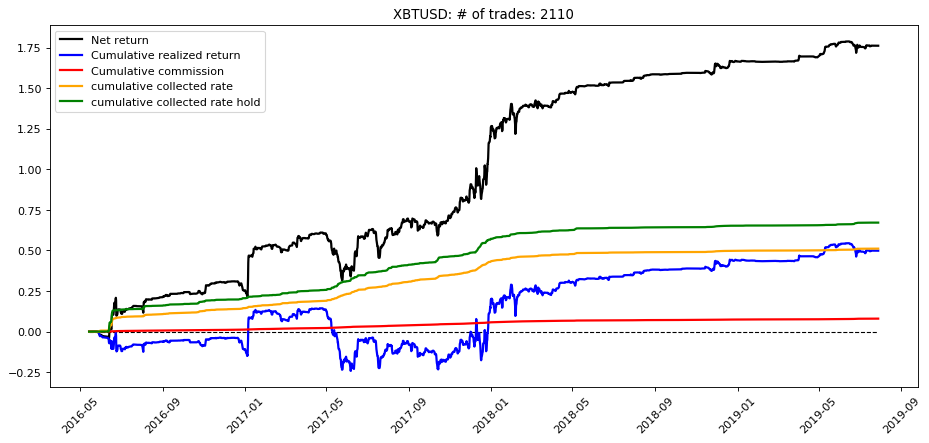

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2019-07-28 12:00:00,2232,2110,1230,880,49.86 %,51.13 %,67.15 %,5.38 %,2.62 %,176.14 %,65.21 %,0.056239,31.44 %,2.07413,57.44 %,50.8 %,62.2 %,94.53 %,0.0 %,0.0 %,100.0 %,1440,24.0


In [180]:
summary, trades = Strategy("XBTUSD", my_signal=["fundingRate"], exchanger="bitmex",
                window_open_wrt_signal=-240, window_mm_open=240, window_hold=24*60, window_mm_close=120, divide=True)
Plot_results(trades,asset = "XBTUSD",show_cumulative=True)
summary

<hr><hr><hr><hr><hr>

## A quick look to binance
As we observed in the previous results, binance doesn't react to the fundingRate as bitmex does. This allows, in theory, to trade a profitable trading strategy: the return is on average the fundingRate amount, with a sharpe ratio of 4

 [████████████████████████████████████████████████████████████] 479868/479868 [00:13<00:00, 0.00s/it]

asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=0, percent=383905, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


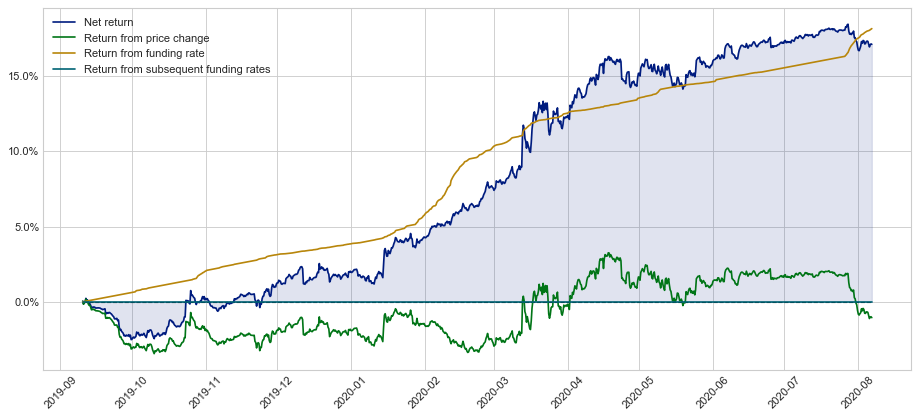

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2019-09-10 08:00:00 to 2020-08-06 16:00:00,995,995,172,823,-1.04 %,18.131 %,0.0 %,0.0 %,0.0 %,17.091 %,18.79 %,-0.025631,7.079 %,2.654427,53.668 %,52.734 %,58.14 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


In [3]:
summary,trades = Strategy("XBTUSD",                    # Name of the asset
                          exchanger= "binance",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
Plot_results(trades, asset = "XBTUSD",show_cumulative=True)
summary

 [████████████████████████████████████████████████████████████] 365281/365281 [00:08<00:00, 0.00s/it]

asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=0, window_hold=2,window_mm_close=10, window_open_wrt_signal=-1,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=0, percent=292235, equity_per_trade=0.1, test=False, market_making=False, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


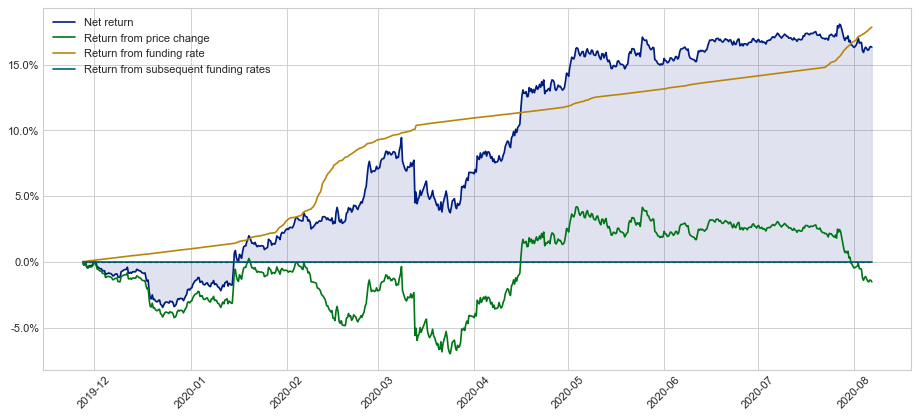

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2019-11-27 08:00:00 to 2020-08-06 16:00:00,761,761,20,741,-1.52 %,17.858 %,0.0 %,0.0 %,0.0 %,16.338 %,23.478 %,-0.059668,10.156 %,2.311863,52.037 %,51.687 %,65.0 %,100.0 %,0.0 %,0.0 %,0.0 %,2,0.03


In [4]:
summary,trades = Strategy("ETHUSD",                    # Name of the asset
                          exchanger= "binance",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 2,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
Plot_results(trades, asset = "ETHUSD",show_cumulative=True)
summary

<hr><hr><hr><hr><hr>

### Out of sample
We can see both ether and Btc performing positively out of sample in the two strategies outlined above.

In [56]:
summary, trades = Strategy("XBTUSD", my_signal=["fundingRate"], exchanger="bitmex",
                window_open_wrt_signal=-240, window_mm_open=240, window_hold=24*60, window_mm_close=120, divide=True, test=True)
Plot_results(trades,asset = "XBTUSD",show_cumulative=True)
summary

 [█████████###################################################] 418742/2557742 [00:16<00:00, 0.00s/it]

KeyboardInterrupt: 

 [████████████████████████████████████████████████████████████] 2557742/2557742 [07:50<00:00, 0.00s/it]

asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=239, window_hold=1440,window_mm_close=120, window_open_wrt_signal=-240,long=True, short=True, date_start=2010-01-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2047634, equity_per_trade=0.1, test=True, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


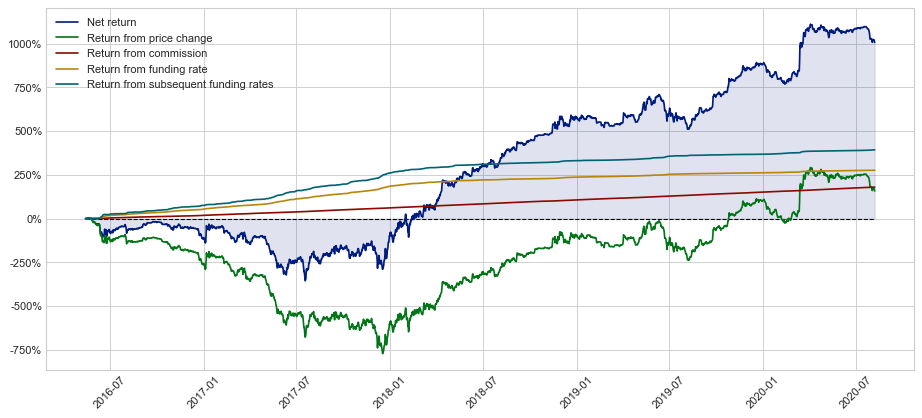

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2016-05-14 12:00:00 to 2020-08-05 20:00:00,4584,4383,1424,2959,157.86 %,276.592 %,393.126 %,109.575 %,70.475 %,1007.628 %,238.048 %,0.028513,197.597 %,1.204714,52.407 %,49.104 %,59.27 %,95.615 %,0.0 %,0.0 %,100.0 %,1440,24.0


In [58]:
summary, trades = Strategy("ETHUSD", my_signal=["fundingRate"], exchanger="bitmex",
                window_open_wrt_signal=-240, window_mm_open=240, window_hold=24*60, window_mm_close=120, divide=False, test=True)
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

### Why do we earn money with this strategy?
- Risk
- Liquidity premium
- Work!

## Longer period - Used for thesis

In [20]:
summary, trades = Strategy("XBTUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 18*60+5,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

 [████████████████████########################################] 368878/1060183 [00:16<00:00, 0.00s/it]

KeyboardInterrupt: 

In [ ]:
summary, trades = Strategy("XBTUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 18*60+5,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [-0.04/100],        ###
                          short_param = [0.03/100],        ###
                          date_start = "2018-08-01",
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

In [ ]:
summary, trades = Strategy("ETHUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 18*60+5,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0.12/100],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

In [ ]:
summary, trades = Strategy("ETHUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal = -1, # When to open with respect to signal (at close)
                          window_hold = 18*60+5,             # How many minutes should we hold the trade
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = False,       # Use market making strategy
                          commission_market_taking = 0,# Set commission
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

 [████████████████████████████████████████████████████████████] 1060079/1060079 [02:23<00:00, 0.00s/it]

asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=59, window_hold=1080,window_mm_close=60, window_open_wrt_signal=-60,long=True, short=True, date_start=2018-08-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2047634, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


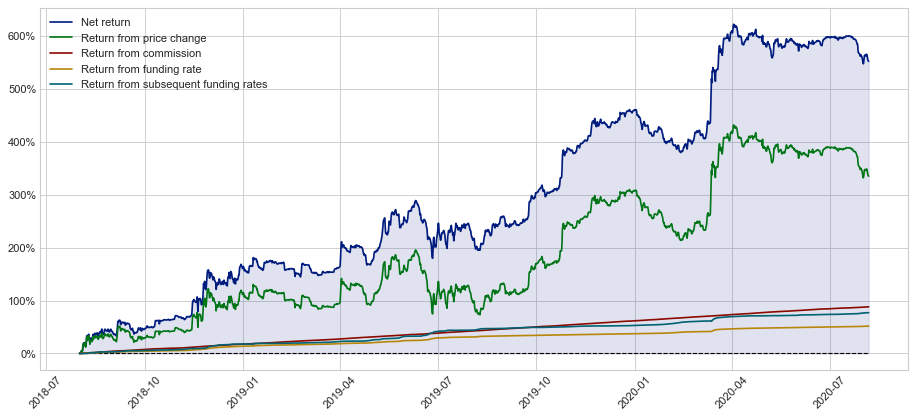

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2018-08-01 04:00:00 to 2020-08-06 04:00:00,2209,2060,617,1443,334.98 %,51.68 %,77.083 %,51.5 %,36.7 %,551.943 %,273.722 %,0.061689,138.062 %,1.982605,51.408 %,49.48 %,55.916 %,93.255 %,0.0 %,0.0 %,100.0 %,1080,18.0


In [21]:
summary, trades = Strategy("XBTUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal=-60, 
                          window_mm_open=60, 
                          window_hold=18*60, 
                          window_mm_close=60,
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = True,       # Use market making strategy
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

 [████████████████████████████████████████████████████████████] 1058093/1058093 [02:21<00:00, 0.00s/it]

asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=59, window_hold=1080,window_mm_close=60, window_open_wrt_signal=-60,long=True, short=True, date_start=2018-08-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=847434, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


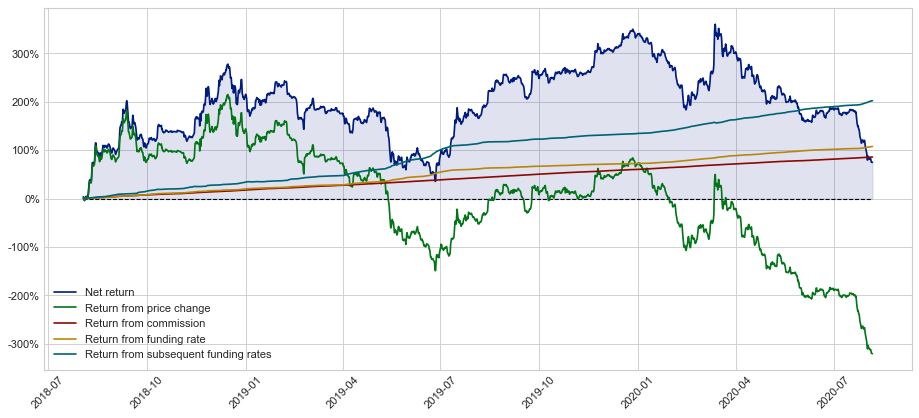

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-02 12:00:00 to 2020-08-06 04:00:00,2205,2058,70,1988,-320.72 %,107.614 %,202.338 %,51.45 %,34.45 %,75.132 %,37.361 %,0.014098,178.821 %,0.208931,49.66 %,49.648 %,50.0 %,93.333 %,0.0 %,0.0 %,100.0 %,1080,18.0


In [22]:
summary, trades = Strategy("ETHUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal=-60, 
                          window_mm_open=60, 
                          window_hold=18*60, 
                          window_mm_close=60,
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = True,       # Use market making strategy
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

Not published

 [████████████████████████████████████████████████████████████] 1058093/1058093 [00:25<00:00, 0.00s/it]

asset=ETHUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0.0012], window_mm_open=59, window_hold=1080,window_mm_close=60, window_open_wrt_signal=-60,long=True, short=True, date_start=2018-08-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=847434, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


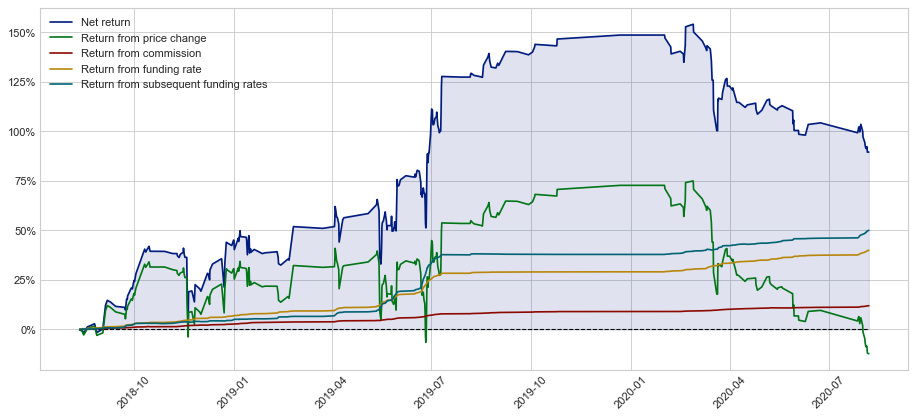

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=ETHUSD, my_signal=['fundingRate'],long_p...",from 2018-08-12 04:00:00 to 2020-08-06 04:00:00,303,279,70,209,-12.24 %,39.869 %,49.961 %,6.975 %,4.975 %,89.539 %,45.078 %,0.046287,124.552 %,0.361925,49.821 %,49.761 %,50.0 %,92.079 %,0.0 %,0.0 %,100.0 %,1080,18.0


In [23]:
summary, trades = Strategy("ETHUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal=-60, 
                          window_mm_open=60, 
                          window_hold=18*60, 
                          window_mm_close=60,
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0.12/100],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = True,       # Use market making strategy
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

 [████████████████████████████████████████████████████████████] 1060079/1060079 [00:32<00:00, 0.00s/it]

asset=XBTUSD, my_signal=['fundingRate'],long_param=[-0.0004],short_param=[0.0003], window_mm_open=59, window_hold=1080,window_mm_close=60, window_open_wrt_signal=-60,long=True, short=True, date_start=2018-08-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2047634, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


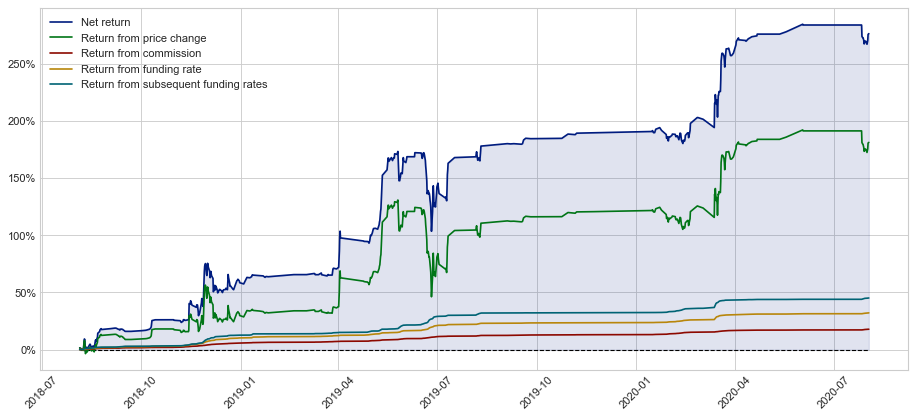

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2018-08-05 04:00:00 to 2020-08-02 12:00:00,431,403,214,189,181.15 %,32.134 %,45.134 %,10.075 %,7.775 %,276.267 %,138.513 %,0.070442,124.143 %,1.11575,54.342 %,52.91 %,55.607 %,93.503 %,0.0 %,0.0 %,100.0 %,1080,18.0


In [24]:
summary, trades = Strategy("XBTUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal=-60, 
                          window_mm_open=60, 
                          window_hold=18*60, 
                          window_mm_close=60,
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [-0.04/100],            # Open position if rate < this parameter
                          short_param = [0.03/100],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = True,       # Use market making strategy
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary